In [21]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage


In [22]:
csv_path = '../Data/doc_csv/TLBR_68.csv'
img_path = '../Data/doc_images/68.jpg'

read the csv after finding horizontal threshold, vertical thresholds. make it such that it follows the given format

final csv is the csv that has columns Id, Top-Left, Bottom-Right, Top, Left, Bottom, Right, Top_box, Bottom_box, Left_box, Right_box

Id - refers to box ID -> int

Top-Left,Bottom-Right - refers to the xy coordinates of topleft and bottomright coordinate of a bounding box

Top/Left/Bottom/Right - refers to the coordinates of edge centers

Top_box/Bottom_box/Left_box/Right_box - refers to the nearest box from current box such that the words across paragraphs or columns should not get connected -> List:[dist, nearest box ID]


In [23]:

df = pd.read_csv(csv_path)
img = cv2.imread(img_path)

Given below are two functions to visualize the document image and the connections established.

visualize_bboxes() can be used to visualize a document image with the bounding boxes around words. Bounding box information is given in the CSVs provided

make_connections() can be used to verify and visualize the connections established between words such that it satisfies the given criteria of grouping words in a logical paragraph. This function has to be used after getting the final csv in the specified format

In [24]:
def visualize_bboxes(img):
  img_2 = img.copy()
  for index, rows in df.iterrows():
    top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
    # print(top_left)
    cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

  plt.imshow(img_2)

In [25]:
def make_connections(image):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left'][0])
      right = int(row['Right'][0])
      top = int(row['Top'][1])
      bottom = int(row['Bottom'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top_Box'][1])
      bottom_adjacent_id = int(row['Bottom_Box'][1])
      left_adjacent_id = int(row['Left_Box'][1])
      right_adjacent_id = int(row['Right_Box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

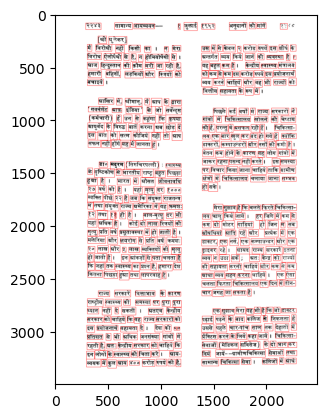

In [26]:

visualize_bboxes(img)

In [27]:
def custom_euclidean(X1 , X2):
    top_left_1 = (int(X1[0].split(',')[0][1:]),int(X1[0].split(',')[1][:-1]))
    bottom_right_1 = (int(X1[1].split(',')[0][1:]),int(X1[1].split(',')[1][:-1]))

    top_left_2 = (int(X2[0].split(',')[0][1:]),int(X2[0].split(',')[1][:-1]))
    bottom_right_2 = (int(X2[1].split(',')[0][1:]),int(X2[1].split(',')[1][:-1]))

    center_1 = [(top_left_1[0] + bottom_right_1[0]) // 2, (top_left_1[1] + bottom_right_1[1]) // 2]
    center_2 = [(top_left_2[0] + bottom_right_2[0]) // 2, (top_left_2[1] + bottom_right_2[1]) // 2]

    return np.sqrt((center_1[0] - center_2[0]) ** 2 + (center_1[1] - center_2[1]) ** 2)
    

In [28]:
img_csv = pd.read_csv(csv_path)
X = img_csv.iloc[:, 1:4].values
img_csv.columns
print(X.shape)

(498, 3)


In [29]:
num_points = X.shape[0]
X_trans = np.zeros((X.shape[0] , 2))
for i in range(num_points):
    top_left_1 = [int(X[i][0].split(',')[0][1:]),int(X[i][0].split(',')[1][:-1])]
    bottom_right_1 = [int(X[i][1].split(',')[0][1:]),int(X[i][1].split(',')[1][:-1])]
    center_1 = [(top_left_1[0] + bottom_right_1[0]) // 2, (top_left_1[1] + bottom_right_1[1]) // 2]
    X_trans[i] = np.array(center_1).astype('float')

In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [31]:
from sklearn.metrics import pairwise_distances
def vertical_dis(X1 , X2):
    return abs(X1[1] - X2[1])

def horizontal_dis(X1 , X2):
    return abs(X1[0] - X2[0])

vertical_dis_matrix = pairwise_distances(X_trans , X_trans , metric=vertical_dis)
horizontal_dis_matrix = pairwise_distances(X_trans , X_trans , metric=horizontal_dis)

In [32]:
clustering_ver = AgglomerativeClustering(n_clusters=4, affinity='precomputed', compute_distances=True,linkage='single').fit(vertical_dis_matrix)
clustering_hor = AgglomerativeClustering(n_clusters=2, affinity='precomputed',compute_distances=True, linkage='single').fit(horizontal_dis_matrix)


/Users/sarthak/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/sarthak/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


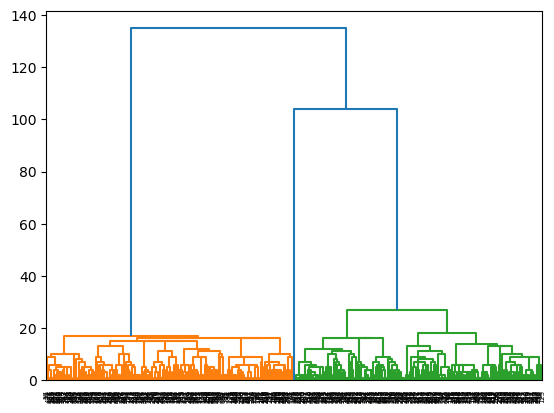

In [33]:
plot_dendrogram(clustering_hor)

For horizontal distance , clear clusters are formed at distances around 130-140

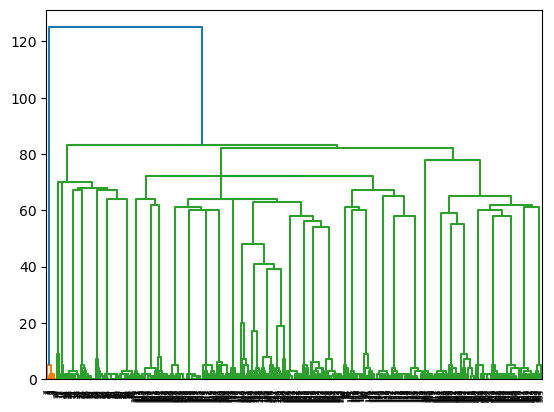

In [34]:
plot_dendrogram(clustering_ver)

For Vertical distance seperation between clusters is much more less , it is not clear here , so lets try with euclidean distance

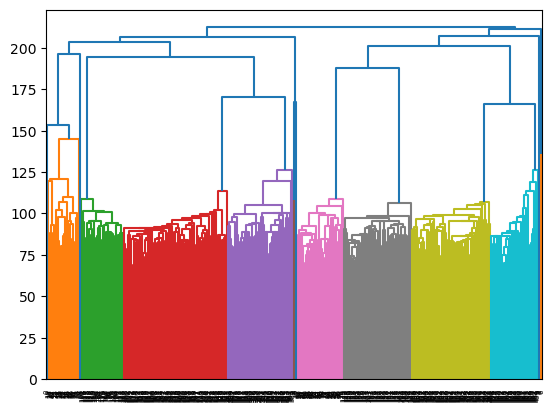

In [35]:

clustering_euc = AgglomerativeClustering(n_clusters=100 , compute_distances=True , linkage='single').fit(X_trans)
plot_dendrogram(clustering_euc)

If the total distance has to be around , 200 , distance in vertical direction should be around 20

In [36]:
columns = ['Id','Top','Bottom','Left','Right', 'Top_Box', 'Bottom_Box', 'Left_Box','Right_Box' ]

thresh = [20 , 140]

In [37]:
data = []
X = img_csv.iloc[:, 1:4].values

for i in range(X_trans.shape[0]):
    top_box = [np.inf , -1]
    bottom_box = [np.inf , -1]
    right_box = [np.inf , -1]
    left_box = [np.inf , -1]

    top_box_indices = np.where(X_trans[: , 1] < X_trans[i][1])[0]
    bottom_box_indices = np.where(X_trans[: , 1] > X_trans[i][1])[0]
    right_box_indices = np.where(X_trans[: , 0] > X_trans[i][0])[0]
    left_box_indices = np.where(X_trans[: , 0] < X_trans[i][0])[0]

    for index in top_box_indices:
        dis = np.sqrt((X_trans[index][0] - X_trans[i][0]) ** 2 + (X_trans[index][1] - X_trans[i][1]) ** 2)
        if(dis < top_box[0] and dis < thresh[1]):
            top_box = [dis , index]
    
    for index in bottom_box_indices:
        dis = np.sqrt((X_trans[index][0] - X_trans[i][0]) ** 2 + (X_trans[index][1] - X_trans[i][1]) ** 2)
        if(dis < bottom_box[0] and dis < thresh[1]):
            bottom_box = [dis , index]

    for index in right_box_indices:
        dis = np.sqrt((X_trans[index][0] - X_trans[i][0]) ** 2 + (X_trans[index][1] - X_trans[i][1]) ** 2)
        if(dis < right_box[0] and dis < thresh[0]):
            right_box = [dis , index]

    for index in left_box_indices:
        dis = np.sqrt((X_trans[index][0] - X_trans[i][0]) ** 2 + (X_trans[index][1] - X_trans[i][1]) ** 2)
        if(dis < left_box[0] and dis < thresh[0]):
            left_box = [dis , index]  

    if(top_box[1] == -1):
        top_box = [-1,0]

    if(right_box[1] == -1):
        right_box = [-1,0]

    if(left_box[1] == -1):
        left_box = [-1,0]

    if(bottom_box[1] == -1):
        bottom_box = [-1,0]

    top_left = [int(X[i][0].split(',')[0][1:]),int(X[i][0].split(',')[1][:-1])]
    bottom_right = [int(X[i][1].split(',')[0][1:]),int(X[i][1].split(',')[1][:-1])]

    top_edge = [(top_left[0] + bottom_right[0])//2 , top_left[1]]
    bottom_edge = [(top_left[0] + bottom_right[0])//2 , bottom_right[1]]
    left_edge = [top_left[0] , (top_left[1] + bottom_right[1])//2]
    right_edge = [bottom_right[0] , (top_left[0] + bottom_right[0])//2]

    data.append([i , top_edge , bottom_edge , left_edge , right_edge , top_box , bottom_box , left_box , right_box])


In [38]:
euclidean = pd.DataFrame(data , columns=columns)
euclidean.head()

,Id,Top,Bottom,Left,Right,Top_Box,Bottom_Box,Left_Box,Right_Box
0,0,"[362, 85]","[362, 147]","[290, 116]","[435, 362]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
1,1,"[646, 82]","[646, 147]","[563, 114]","[730, 646]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
2,2,"[842, 92]","[842, 140]","[744, 116]","[940, 842]","[-1, 0]","[-1, 0]","[-1, 0]","[-1, 0]"
3,3,"[1173, 92]","[1173, 147]","[1163, 119]","[1184, 1173]","[108.00462953040486, 4]","[-1, 0]","[-1, 0]","[-1, 0]"
4,4,"[1281, 79]","[1281, 157]","[1218, 118]","[1344, 1281]","[-1, 0]","[108.00462953040486, 3]","[-1, 0]","[-1, 0]"


In [39]:

image_with_boxes = make_connections(img)

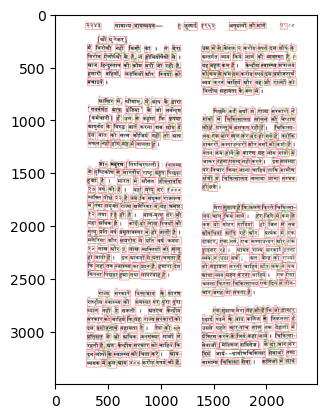

In [40]:
plt.imshow(image_with_boxes)